### Итоговая аттестация слушателя курса "Data science" Сапожниковой Альбины

In [6]:
# все необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
import xgboost as xgb
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
# путь 
path ='ebw_data.csv'


In [8]:
# чтение данных
data = pd.read_csv(path)


Предобработка данных

In [9]:
data.head()


,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [11]:
data.describe()


,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [12]:
data.shape


(72, 6)

In [13]:
data.columns


Index(['IW', 'IF', 'VW', 'FP', 'Depth', 'Width'], dtype='object')

In [14]:
data.isnull().sum()


IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

Визуализация

In [16]:
df = data.copy()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82d7a4f8b0>,
      dtype=object)

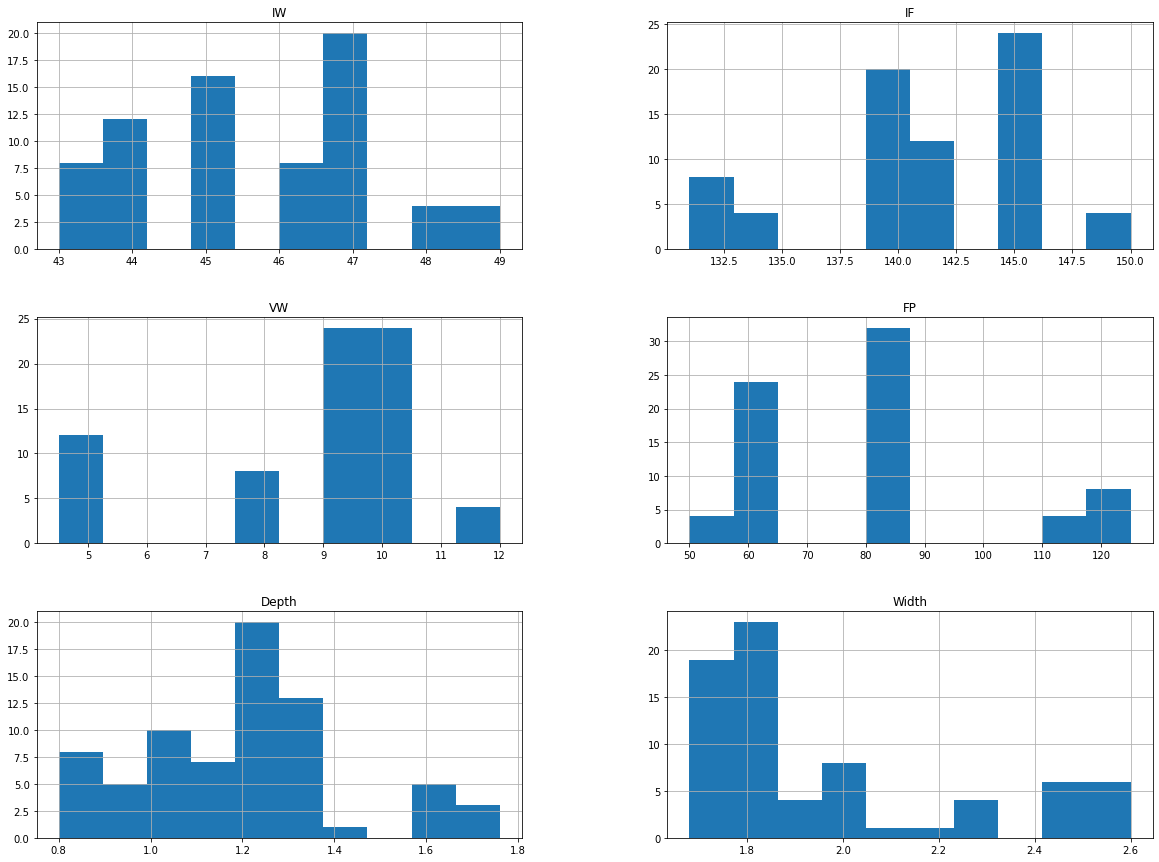

In [17]:
df.hist(figsize=(20,15))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82d76fa9a0>,
      dtype=object)

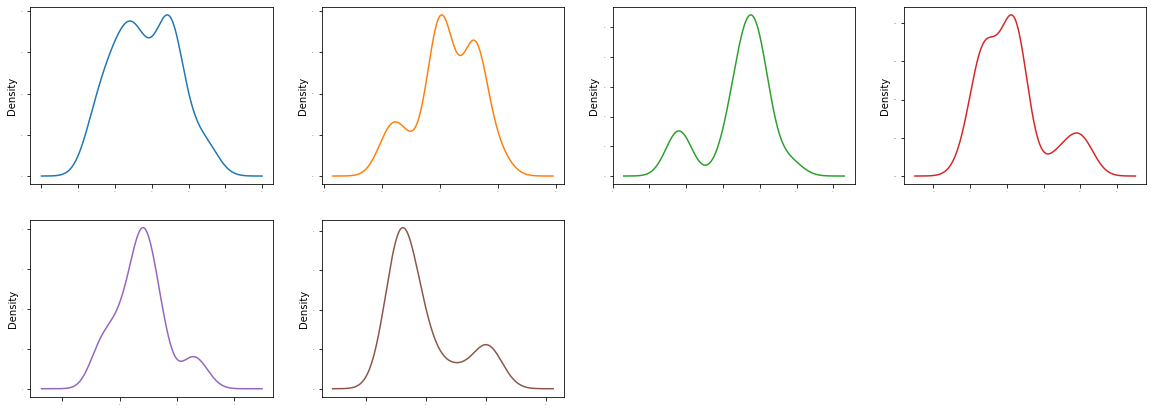

In [18]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=(20,15))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


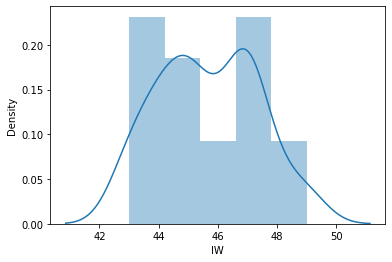

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


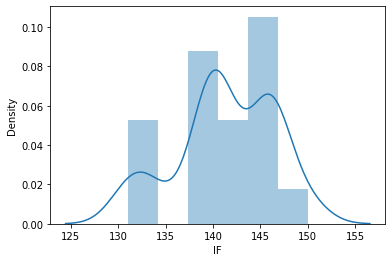

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


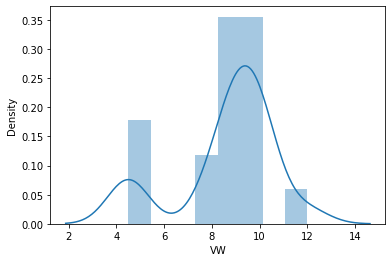

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


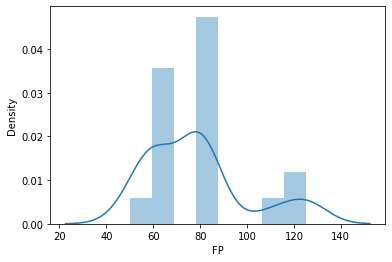

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


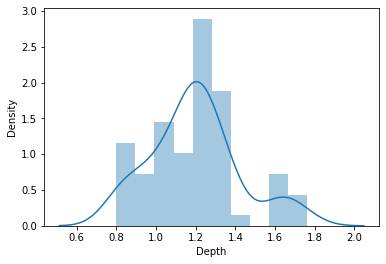

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


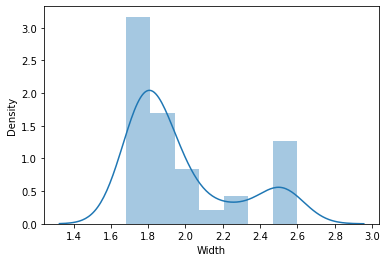

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


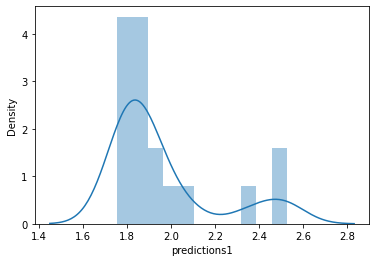

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


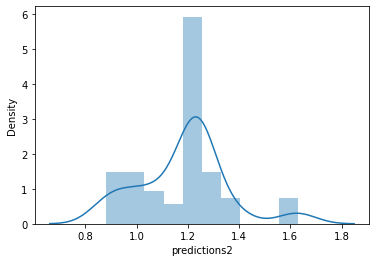

In [46]:
# гистограммы для каждого признака 
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

IW           AxesSubplot(0.125,0.71587;0.168478x0.16413)
IF        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
VW        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
FP        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Depth       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Width    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

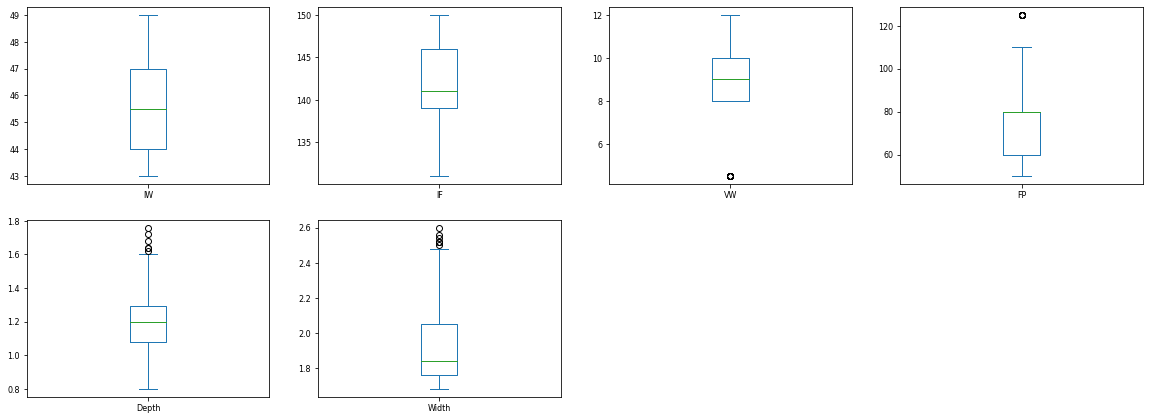

In [20]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=(20,15))


Матрица корреляции

In [22]:
corr_matrix = df.corr()
corr_matrix


,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.861073,-0.043430,0.835530,-0.289568,0.434869
IF,-0.861073,1.000000,0.115093,-0.980562,0.376084,-0.510167
VW,-0.043430,0.115093,1.000000,-0.001060,-0.671437,-0.874257
FP,0.835530,-0.980562,-0.001060,1.000000,-0.510748,0.412962
Depth,-0.289568,0.376084,-0.671437,-0.510748,1.000000,0.425391
Width,0.434869,-0.510167,-0.874257,0.412962,0.425391,1.000000


Тепловая карта матрицы корреляции

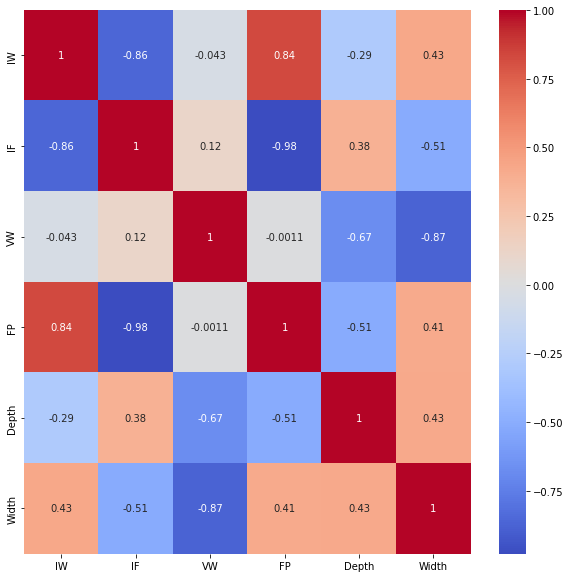

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Модели машшиного обучения

In [26]:
y1_name = 'Width'
y2_name = 'Depth'


In [27]:
y1 = df[y1_name]
y2 = df[y2_name]


In [28]:
X = df.drop([y1_name, y2_name], axis=1)


In [29]:
# стандартизация данных
StandardScaler = sklearn.preprocessing.StandardScaler()

In [30]:
X_sc = StandardScaler.fit_transform(X)

In [31]:
X_sc

array([[ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [ 0.2       , -0.

In [32]:
models = [
    xgb.XGBRegressor(),
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    neighbors.KNeighborsRegressor(),
    tree.DecisionTreeRegressor(),
    ensemble.RandomForestRegressor(),
    ensemble.GradientBoostingRegressor(),
    MLPRegressor()
]


Кросс валидация

In [34]:
best_score1 = 0
best_model1 = models[0]
for model in models:
    scores = cross_val_score(model, X_sc, y1, scoring='neg_mean_squared_error', cv=5)
    R2 = cross_val_score(model, X_sc, y1, scoring='r2', cv=5)

    if R2.mean() > best_score1:
        best_score1 = R2.mean()
        best_model1 = model
print(model)
print('R2: ', R2.mean())
print('MSE: ', scores.mean())


[14:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

MLPRegressor()
R2:  -13.50901497711273
MSE:  -0.21277332498188825


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
best_model1

XGBRegressor()

In [36]:
# кросс валидация для y2


In [37]:
best_score2 = 0
best_model2 = models[0]
for model in models:
    scores = cross_val_score(model, X_sc, y2, scoring='neg_mean_squared_error', cv=5)
    R2 = cross_val_score(model, X_sc, y2, scoring='r2', cv=5)
    if R2.mean() > best_score2:
        best_score2 = R2.mean()
        best_model2 = model

print(model)
print('R2: ', R2.mean())
print('MSE: ', scores.mean())



[14:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()
R2:  -1.9622288064728426
MSE:  -0.11638951220919395


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
# предсказания по наилучшей модели кроссвалидации
predictions1 = cross_val_predict(best_model1, X, y1, cv=5)
predictions2 = cross_val_predict(best_model2, X, y2, cv=5)

[14:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
# все метрики
print('MSE for y1: ', mean_squared_error(y1, predictions1))
print('R2 for y1: ', r2_score(y1, predictions1))
print('MSE for y2: ', mean_squared_error(y2, predictions2))
print('R2 for y2: ', r2_score(y2, predictions2))



MSE for y1:  0.012875851742584012
R2 for y1:  0.8323058767355986
MSE for y2:  0.024695560309085332
R2 for y2:  0.5056738039252924


In [40]:
df['predictions1'] = predictions1
df['predictions2'] = predictions2

In [41]:
df.head()

,IW,IF,VW,FP,Depth,Width,predictions1,predictions2
0,47,139,4.5,80,1.60,2.54,2.487113,1.381532
1,47,139,4.5,80,1.62,2.50,2.487113,1.381532
2,47,139,4.5,80,1.68,2.60,2.487113,1.381532
3,47,139,4.5,80,1.58,2.52,2.487113,1.381532
4,45,140,4.5,80,1.76,2.48,2.351163,1.258064


In [42]:
IW = widgets.IntSlider(min=df['IW'].min(), max=df['IW'].max(), step=1, value=df['IW'].min())
IF = widgets.IntSlider(min=df['IF'].min(), max=df['IF'].max(), step=1, value=df['IF'].min())

In [43]:
VW = widgets.FloatSlider(min=df['VW'].min(), max=df['VW'].max(), step=0.1, value=df['VW'].min())
FP = widgets.FloatSlider(min=df['FP'].min(), max=df['FP'].max(), step=0.1, value=df['FP'].min())


In [44]:
#предсказания модели
def predict(IW, IF, VW, FP):
    best_model1.fit(X_sc, y1)
    best_model2.fit(X_sc, y2)
    X_new = [[IW, IF, VW, FP]]
    X_new_sc = StandardScaler.transform(X_new)
    y1_pred = best_model1.predict(X_new_sc)
    y2_pred = best_model2.predict(X_new_sc)
    #f string with 2 decimal places

    return f'Width={y1_pred[0]:.2f}, Depth={y2_pred[0]:.2f}'

In [45]:
#приложение для взаимодействия
interact(predict, IW=IW, IF=IF, VW=VW, FP=FP)

interactive(children=(IntSlider(value=43, description='IW', max=49, min=43), IntSlider(value=131, description=…

<function __main__.predict(IW, IF, VW, FP)>